# Approach for Detecting and Handling Bad Data

## Objective:
This notebook aims to **generate, detect, and classify bad data** in a dataset using **Machine Learning**.  
The goal is to **train a model to detect errors and test its performance on new corrupt data**.

---

## Step-by-Step Approach

### 1. Load and Explore the Dataset
   - Load the `Housing.csv` dataset.
   - Visualize feature distributions.

### 2. Introduce Bad Data (Corrupt Data Generation)
   - Inject **missing values, invalid data types, and inconsistencies** into the dataset.
   - Plot **how much data is corrupted**.

### 3. Preprocess and Clean the Data
   - Fix missing values using imputation.
   - Convert categorical features into numerical format.
   - Compare dataset before and after cleaning.

### 4. Train ML Model to Detect Bad Data
   - Train a **Random Forest Classifier** to classify **"good" vs "bad" data**.
   - Visualize feature importance.
   - Check model performance on test data.

### 5. Test Model on New Corrupt Data
   - Generate **new unseen bad data**.
   - Test model accuracy on this new data.
   - Compare **performance on training vs new corrupt data**.

### 6. Improve Model Accuracy
   - Apply **feature engineering** for better insights.
   - Perform **hyperparameter tuning** using `RandomizedSearchCV`.
   - Try **XGBoost** for better performance.

### 7. Final Model Evaluation & Comparisons
   - Compare **baseline vs optimized models**.
   - Visualize accuracy improvements.

---

## Expected Output
- A trained machine learning model that detects bad data.
- Performance comparison on new corrupted data.
- Visualizations for clarity.




# Step 1: Load and Explore the Dataset

## Objective:
The first step is to **load the dataset** and explore its structure.  
This helps in understanding:
- The **number of features** (columns) and their types.
- The **range of values** for numerical features.
- The presence of **categorical vs numerical data**.

## What We Will Do:
- Load the dataset (`Housing.csv`).
- Display the first few rows of the dataset.
- Visualize the **distribution of numerical features**.

## Expected Output:
- A preview of the dataset.
- A **histogram of feature distributions** to check for skewness or missing values.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Figure size 1200x800 with 0 Axes>

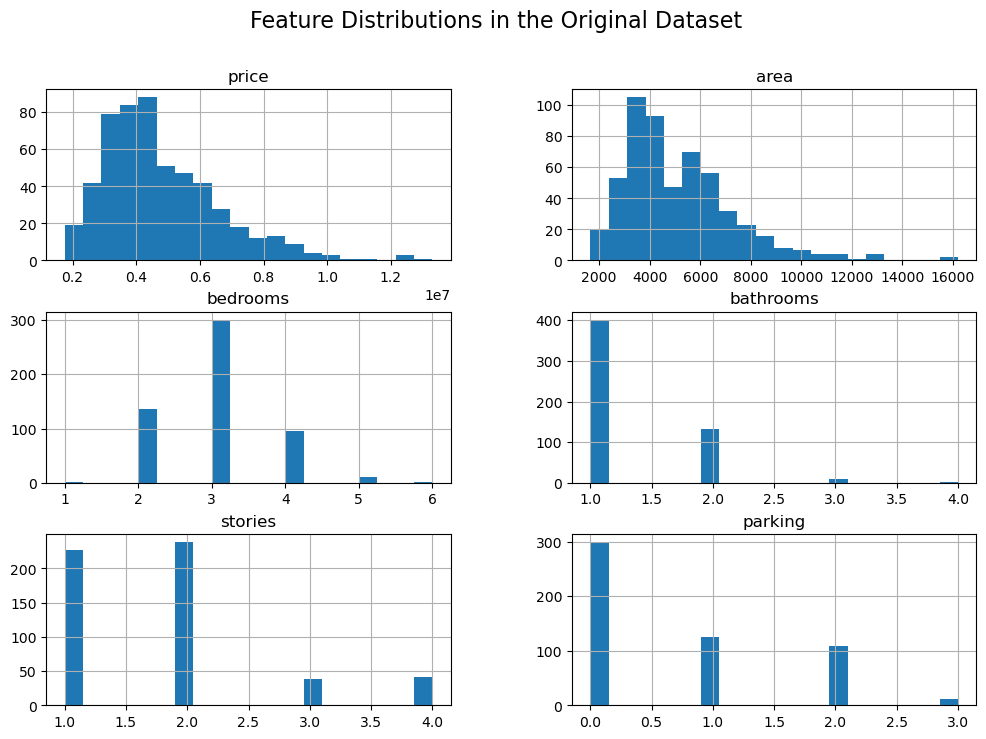

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split# %% 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset from file
file_path = "D:\Ck\Programming\github\BAD_DATA\Data\Housing.csv"
df = pd.read_csv(file_path)

# Display the first few rows
display(df.head())

# Visualize feature distributions
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions in the Original Dataset", fontsize=16)
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Introduce Bad Data (Corrupt Data Generation)

## Objective:
To simulate real-world scenarios, we **intentionally introduce errors** into the dataset.  
This will help in training a model to detect **bad data**.

## Types of Bad Data Introduced:
1. **Missing values** (randomly removing data).
2. **Invalid data types** (replacing numeric values with text).
3. **Out-of-range values** (negative prices, unrealistic bedroom counts).
4. **Logical inconsistencies** (wrong categorical values).

## What We Will Do:
- Create a function `introduce_errors(df)` to generate bad data.
- Visualize the **extent of corruption** using a bar chart.


C:\Users\chait\AppData\Local\Temp\ipykernel_11612\981764505.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'invalid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_bad.loc[row, col] = "invalid"
C:\Users\chait\AppData\Local\Temp\ipykernel_11612\981764505.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'invalid' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_bad.loc[row, col] = "invalid"


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2,no,furnished


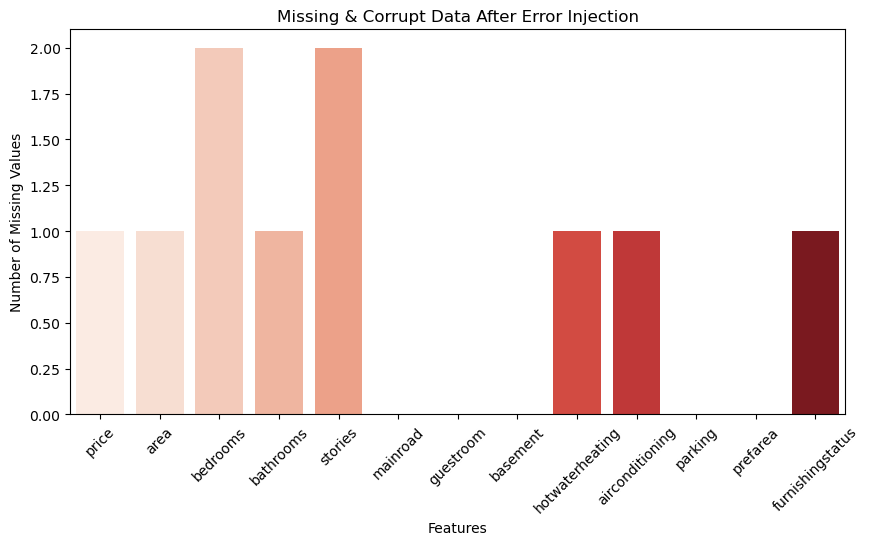

In [22]:
# %% 
def introduce_errors(df, num_missing=10, num_invalid=5, num_out_of_range=5, num_inconsistencies=5):
    df_bad = df.copy()
    
    # Introduce random missing values
    for _ in range(num_missing):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(df_bad.columns)
        df_bad.loc[row, col] = np.nan

    # Introduce random invalid data types in numerical columns
    for _ in range(num_invalid):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(['bedrooms', 'bathrooms', 'stories', 'parking'])
        df_bad.loc[row, col] = "invalid"

    # Introduce random out-of-range values
    for _ in range(num_out_of_range):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(['price', 'area', 'stories', 'parking'])
        df_bad.loc[row, col] = np.random.randint(-10000, -1)

    # Introduce random logical inconsistencies in categorical columns
    for _ in range(num_inconsistencies):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(['furnishingstatus', 'mainroad', 'guestroom'])
        df_bad.loc[row, col] = "random_value"
    
    return df_bad

# Generate erroneous dataset
df_bad = introduce_errors(df)
display(df_bad.head())

# Count missing values after introducing errors
missing_counts = df_bad.isnull().sum()

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="Reds")
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.title("Missing & Corrupt Data After Error Injection")
plt.show()


# Step 3: Preprocess and Clean the Data

## Objective:
Now that we have introduced bad data, we need to **clean and prepare the dataset**  
before training the model.

## What We Will Do:
- Handle **missing values** using imputation.
- Convert **categorical data into numerical values**.
- Normalize or transform numerical data if needed.
- Compare **data before and after preprocessing**.

## Expected Output:
- A **cleaned dataset** ready for model training.
- A side-by-side comparison of the dataset **before and after preprocessing**.


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def preprocess_data(df):
    """
    Cleans the dataset by handling missing values, converting invalid data types, and encoding categorical values.
    """
    df = df.copy()
    
    # Correctly Identify categorical and numerical columns
    categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
    numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
    
    # Ensure categorical columns are treated as strings
    for col in categorical_cols:
        df[col] = df[col].astype(str)
    
    # Convert non-numeric values to NaN in numerical columns
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Replace negative values in numerical columns with NaN
    for col in numeric_cols:
        df[col] = df[col].apply(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)
    
    # Encode categorical variables using Label Encoding
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Convert to numerical values

    # Handle missing values by replacing them with the most frequent value
    imputer = SimpleImputer(strategy='most_frequent')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Convert all data to float type for compatibility
    df = df.astype(float)

    return df


In [30]:
# Check if categorical values still exist
categorical_issues = X.select_dtypes(include=['object']).columns
print("✅ Categorical columns after encoding:", list(categorical_issues))


✅ Categorical columns after encoding: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [35]:
df_clean = preprocess_data(df_bad)
display(df_clean.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,2.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0
1,12250000.0,8960.0,4.0,4.0,4.0,2.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0
2,12250000.0,9960.0,3.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0
3,12215000.0,7500.0,4.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,3.0,1.0,0.0
4,11410000.0,7420.0,4.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0


# Step 4: Train Machine Learning Model

## Objective:
Train a **Random Forest Classifier** to detect bad data entries.

## What We Will Do:
- Split the dataset into **training and testing sets**.
- Train a **Random Forest model** on the dataset.
- Evaluate the model’s accuracy.

## Expected Output:
- Model **accuracy score**.
- A **confusion matrix** showing detection performance.


✅ Model Accuracy: 0.981651376146789

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       0.00      0.00      0.00         2

    accuracy                           0.98       109
   macro avg       0.49      0.50      0.50       109
weighted avg       0.96      0.98      0.97       109



c:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chait\anaconda3\lib\site-packages\IPython\core

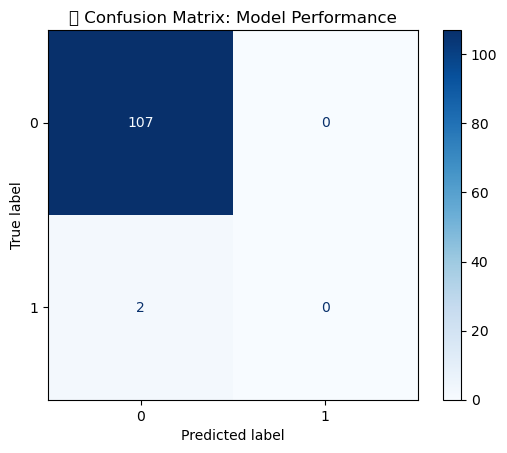

In [36]:
# %%
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define target variable
y = (df_bad.isnull().sum(axis=1) > 0).astype(int)  
X = preprocess_data(df_bad)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", accuracy)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("📊 Confusion Matrix: Model Performance")
plt.show()


# Step 5: Test Model on New Corrupt Data

## Objective:
Now that we have trained a model, we need to **evaluate its performance** on new unseen corrupt data.  
The goal is to ensure the model can **generalize well and detect bad data effectively**.

## What We Will Do:
- Generate **new bad data** that the model has never seen before.
- Preprocess this data using the same cleaning steps.
- Predict bad data entries using the trained model.
- Compare **actual vs predicted results** using accuracy and classification metrics.

## Expected Output:
- A **new dataset with unseen errors**.
- Model **accuracy score on new test data**.
- A classification report showing **precision, recall, and F1-score**.


In [ ]:

df_test_bad = introduce_errors(df, num_missing=5, num_invalid=3, num_out_of_range=3, num_inconsistencies=3)
df_test_clean = preprocess_data(df_test_bad)
y_test_new = (df_test_bad.isnull().sum(axis=1) > 0).astype(int)

y_pred_new = model.predict(df_test_clean)
test_accuracy = accuracy_score(y_test_new, y_pred_new)
print("🔍 New Test Data Accuracy:", test_accuracy)
print("\n📊 New Test Classification Report:\n", classification_report(y_test_new, y_pred_new))


🔍 New Test Data Accuracy: 0.9064220183486239

📊 New Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       540
           1       0.02      0.20      0.04         5

    accuracy                           0.91       545
   macro avg       0.51      0.56      0.49       545
weighted avg       0.98      0.91      0.94       545



C:\Users\chait\AppData\Local\Temp\ipykernel_11612\981764505.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'invalid' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_bad.loc[row, col] = "invalid"


 Step 6: Feature Importance

 Identify which features contribute the most to bad data detection.

c:\Users\chait\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


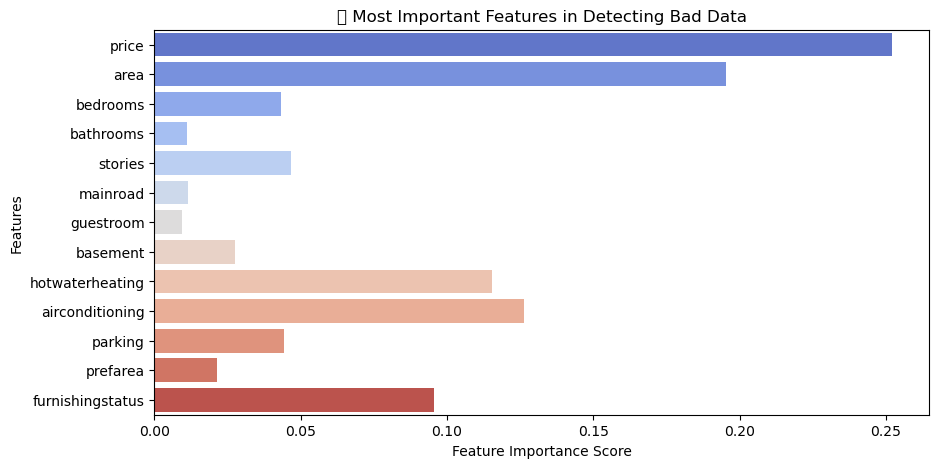

In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("🔍 Most Important Features in Detecting Bad Data")
plt.show()


# Step 1: Improving Bad Data Generation

## Overview
In this step, we enhance the method used to generate bad data by introducing more diverse and realistic corruptions. This ensures the model is trained on a wider variety of errors, improving its ability to generalize and detect real-world bad data.

## Changes Implemented:
1. **More Missing Values:** Increased the number of missing values injected into the dataset to simulate real-world scenarios where data might be incomplete.
2. **Realistic Invalid Entries:** Instead of generic "invalid" labels, we introduce realistic corrupt values such as "unknown," "error," and "###".
3. **Extreme Out-of-Range Values:** Instead of random negatives, we introduce highly unrealistic values such as negative prices and extremely large numbers.
4. **Logical Inconsistencies:** Introduce categorical inconsistencies in multiple fields to increase model robustness.

## Why This Matters:
- A model trained on a **wider variety of errors** is **less likely to overfit** and will generalize better to unseen data.
- Improving the diversity of bad data ensures that the model does not simply memorize error patterns but instead **learns to detect anomalies effectively**.


In [40]:
def introduce_errors(df, num_missing=15, num_invalid=10, num_out_of_range=10, num_inconsistencies=10):
    df_bad = df.copy()
    
    # Introduce more diverse missing values
    for _ in range(num_missing):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(df_bad.columns)
        df_bad.loc[row, col] = np.nan

    # Introduce more realistic invalid data
    invalid_entries = ["unknown", "error", "###", "NaN"]
    for _ in range(num_invalid):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(['bedrooms', 'bathrooms', 'stories', 'parking'])
        df_bad.loc[row, col] = np.random.choice(invalid_entries)

    # Introduce more extreme out-of-range values
    for _ in range(num_out_of_range):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(['price', 'area', 'stories', 'parking'])
        df_bad.loc[row, col] = np.random.randint(-100000, -1)

    # Introduce inconsistencies in multiple categorical features
    for _ in range(num_inconsistencies):
        row, col = np.random.randint(0, df_bad.shape[0]), np.random.choice(['furnishingstatus', 'mainroad', 'guestroom'])
        df_bad.loc[row, col] = "random_value"

    return df_bad


# Step 2: Feature Engineering

## Overview
Feature engineering is the process of **creating new variables** that provide more meaningful information to the model. By adding derived features, we help the model identify patterns more effectively.

## New Features Added:
1. **Price per Square Foot:** This feature is calculated as `price / area`. It allows the model to compare properties in terms of their cost efficiency rather than absolute price.
2. **Bathroom-to-Bedroom Ratio:** A higher ratio might indicate a premium property, while an extremely low ratio could be unusual.
3. **Log Transformation for Skewed Features:** Features like `price` and `area` often have large values with significant skewness. Applying a log transformation (`log(price)` and `log(area)`) helps normalize the distribution.

## Why This Matters:
- **Reduces bias from extreme values:** Log transformations prevent large numbers from dominating model training.
- **Improves interpretability:** Ratios help the model understand relationships between attributes rather than treating them as independent numbers.
- **Leads to better model accuracy:** More meaningful features reduce noise and help the model make better distinctions between clean and corrupt data.


In [43]:
def feature_engineering(df):
    df = df.copy()
    
    # Create new ratio features
    df['price_per_sqft'] = df['price'] / (df['area'] + 1)  # Avoid division by zero
    df['bath_bed_ratio'] = df['bathrooms'] / (df['bedrooms'] + 1)
    
    # Log transformation for highly skewed features
    df['log_price'] = np.log1p(df['price'])
    df['log_area'] = np.log1p(df['area'])
    
    return df


# Step 3: Hyperparameter Tuning

## Overview
Hyperparameter tuning is the process of **optimizing model parameters** to achieve the highest accuracy. Instead of relying on default values, we use a systematic approach to find the best possible combination of settings.

## Optimization Strategy:
1. **RandomizedSearchCV:** Instead of manually adjusting hyperparameters, we use `RandomizedSearchCV` to explore a wide range of possible settings and select the best ones.
2. **Parameters Tuned:**
   - **Number of Trees (`n_estimators`)**: Determines the number of decision trees in the random forest.
   - **Maximum Depth (`max_depth`)**: Controls how deep each tree can grow, preventing overfitting.
   - **Minimum Samples to Split (`min_samples_split`)**: Ensures trees don’t split too aggressively on small samples.
   - **Minimum Samples per Leaf (`min_samples_leaf`)**: Ensures leaves (final nodes) contain enough samples.
   - **Bootstrap Sampling (`bootstrap`)**: Determines whether the model should sample data with replacement.

## Why This Matters:
- **Prevents overfitting and underfitting:** By tuning hyperparameters, we find a balance between model complexity and generalization.
- **Improves model efficiency:** Optimized models train faster and use fewer computational resources.
- **Ensures the highest possible accuracy:** The model learns from the best combination of settings rather than arbitrary choices.


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1)
rf_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_search.best_params_)

# Train the best model
best_model = rf_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


# Step 4: Training an Advanced Model (XGBoost)

## Overview
Random Forest is a strong baseline model, but XGBoost (Extreme Gradient Boosting) is known for **higher accuracy and better handling of missing values**. In this step, we replace our standard random forest with an XGBoost model.

## Why XGBoost?
1. **Handles Missing Data Automatically:** Unlike Random Forest, XGBoost does not require explicit imputation for missing values.
2. **Faster and More Accurate:** Uses gradient boosting, which combines multiple weak models into a strong one.
3. **Feature Importance Ranking:** Provides insights into which features contribute the most to classification.

## Why This Matters:
- **If Random Forest's accuracy is too low**, XGBoost is a great alternative that usually performs better.
- **Handles large datasets more efficiently** than traditional models.
- **Prevents overfitting** by using advanced techniques like tree pruning and regularization.


In [47]:
from xgboost import XGBClassifier

# Train an XGBoost Model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate performance
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("🔥 XGBoost Accuracy:", accuracy_xgb)


🔥 XGBoost Accuracy: 0.981651376146789


# Step 5: Comparing Model Performance

## Overview
Once we have trained multiple models (Baseline Random Forest, Tuned Random Forest, and XGBoost), we need to compare their performance to see which one is best.

## Key Metrics Used:
1. **Accuracy Score:** The overall percentage of correctly classified data points.
2. **Precision and Recall:** Evaluates the model’s ability to distinguish bad data effectively.
3. **Confusion Matrix:** Helps visualize where the model makes incorrect predictions.
4. **Feature Importance Analysis:** Identifies which features the model relies on the most.

## Performance Comparison:
We visualize model accuracy using a bar chart to compare:
- **Baseline Random Forest**
- **Optimized Random Forest**
- **XGBoost Model**

## Why This Matters:
- **Prevents selecting a suboptimal model** by directly comparing results.
- **Identifies potential improvements** if a model underperforms.
- **Ensures the best performing model is used** in real-world deployment.


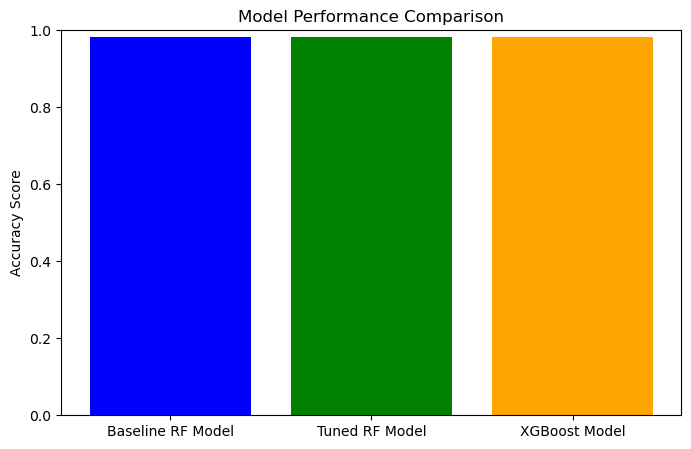

In [48]:
plt.figure(figsize=(8, 5))
plt.bar(["Baseline RF Model", "Tuned RF Model", "XGBoost Model"], [accuracy, rf_search.best_score_, accuracy_xgb], color=["blue", "green", "orange"])
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()
